## Abstract

In this week's lab, we learn about spectra. We take spectra of a neon lamp and of sunlight. We held a neon lamp in front of the Angell Hall CCD to see the emission lines of Neon. We used this spectra to find the wavelength scale. Then, we pointed the Angell Hall telescope at the sky to take spectra of reflected sunlight. In this spectra, we see absorption lines and emission lines for both the Sun and Earth's atmosphere.

The goal of the lab is to work on the raw data that we get and create calibrated solar spectra. From this spectra, we will find absorption lines of the Sun and discuss the relevance of our techniques in the context of astronomy and how absorption lines are important in studying other stars.

## Introduction

There are two kinds of lines we can observe in spectra: emission and absorption lines. Emission lines occur because an electron jumps down a level and the energy is emitted in the form of a photon. Absorption lines occur because an electron jumps up a level and absorbs some energy.

We started by taking spectrum of a known source, a neon lamp. We will find the emission lines in the spectrum of the element lamps to get an idea of how to take spectra and to get a Angstrom to pixel scale to use for the solar spectra.

Introductory information: <br>
3200 Angstrom range <br>
Low resolution grating <br>
Expect 4.3 Angstroms/pixel (won't be constant, will probaly change across the CCD because the dispersion won't be linear)<br>

The Vernier stage is supposed to tell us roughly where we're pointing. The centre wavelength, in microns, was about 6000 Angstroms. This will help us with our data later.

We started by taking 5 bias frames for the neon lamp. Then, we will take calibration frames of the neon lamp. From experimentation, we decided an exposure time of 10 seconds was enough to get a decent number of counts and to see the spectra. Then, we took dark frames with a 10 second exposure time. 

After that, we moved on to taking solar spectra. We pointed the telescope at a patch of blue sky. Unfortunately, there were no clouds out. Clouds would have been nice because they offer a uniform, white background. We decided an exposure time of about 20 seconds gave us a decent number of photon counts. After closing the telescope, we took some dark current frames. We didn't take bias frames in this part of the lab because it is very tricky. Throughout the data taking, the CCD was kept at a temperature of about -16 degrees C.

## Theory

Spectral dispersion is the technique of using a diffraction grating to spread light at different wavelengths out at different angles. The grating equation is given by

$$ sin(\alpha) + sin(\beta) = \frac{m \lambda}{d} $$

Where $\alpha$ is the angle of incidence, $\beta$ is the angle of diffraction, m is the order, d is the groove spacing, and $\lambda$ is the wavelength.

A spectrograph separates and measures the wavelengths of light coming in. The light comes to focus in a slit, then diverges, after that it passes through a columnator so the rays of light in different wavelengths stay parallel. Then, those different rays get captured by the camera. The light is now at different positions and we can see the light at different wavelengths.

The spectra had different spatial properties and different spacings between the orders depending on the groove spacing. The angle alpha depends on how the light enters the spectrograph which depends on the set up. If we're dealing with an uncalibrated image, the grating and angles matter for how the scale (pixels per Angstroms) can be interpreted.

In our data, our spectra has two dimensions. The vertical dimension is just a position dimension. The horizontal axis gives us pixel values that we need to convert to get the wavelengths.

In class we experimented with diffraction gratings and prisms and how to disperse light. The angular dispersion is the amount of change of beta per wavelength. The spectral resolution of the instrument is determined by the separation between the peaks in the spectra. A higher spectral resolution comes from smaller groove spacings.

We will take emission spectra of the neon lamp. The spectra will have peaks, but we don't know the scale. However, with neon, we know the actual emission lines, so we can line up the expected lines and observed peaks. This will give us a scale so that we know the pixel/angstrom ratio and can then read the absorption lines for the sun with the correct units.

The strength of stellar absorption lines is mainly determined by the temperature. For example, with Hydrogen, medium temperature stars have the strongest absorption lines. This may seem counterintuitive.

The strongest features of a stellar absorption spectrum are not always the one with the higest abundances. This is because we only get absorption spectrum if the stellar atmosphere is at the perfect temperature to excite the electrons in the atoms. If the star is too hot, the atom is ionised, and therefore will not absorb/emit a photon as it moves from energy to energy. If the star is too cold, there is not enough energy to excite the electrons to make them jump up a level. The star has to be at a 'medium' temperature for its atmosphere to excite electrons without ionising the atom.

Quantum mechanical effects and thermal effects can broaden wavelengths. Due to quantum mechanics, the energy of the photon is never going to be exact. The position of peaks in spectra can also change depending on doppler shifts due to the line of sight and rotational velocity of a star.


## Experiment and Methodology 

As usual, we start with our imports. 

In [4]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
rc('figure', figsize=(12.0, 9.0)) #imports

Now, we read in the data.

In [5]:
calibration_bias = [] #creating an array for calibration bias images
for i in range(1,10):
    calibration_bias.append(fits.getdata("/Users/bangkung5/Desktop/Lab6/skylabBias0000000"+str(i)+".fit").astype(float))
calibration_bias.append(fits.getdata("/Users/bangkung5/Desktop/Lab6/skylabBias00000010.fit").astype(float))

calibration = [] #spectra from neon lamp
for i in range(11,16):
    calibration.append(fits.getdata("/Users/bangkung5/Desktop/Lab6/skylabSGSNoTarget000000"+str(i)+".fit").astype(float))

calibration_darks = [] #darks/background images
for i in range(16, 21):
    calibration_darks.append(fits.getdata("/Users/bangkung5/Desktop/Lab6/skylabSGSNoTarget000000"+str(i)+".fit").astype(float))

sky = [] #sunlight spectra
for i in range(21, 26):
    sky.append(fits.getdata("/Users/bangkung5/Desktop/Lab6/skylabSGSNoTarget000000"+str(i)+".fit").astype(float))

sky_darks = [] #darks 
for i in range(26, 31):
    sky_darks.append(fits.getdata("/Users/bangkung5/Desktop/Lab6/skylabDark000000"+str(i)+".fit").astype(float))

In [6]:
row_length = calibration_bias[0].shape[1]
print(row_length) #creating a variable called row length so that we can use it for for loops

1530


In [7]:
print(len(calibration_bias), len(calibration), len(calibration_darks), len(sky), len(sky_darks)) #checking that all the data files were read in correctly 

10 5 5 5 5


We just confirmed that all the data has been read in correctly. Now, let's make corrections. We start by finding a mean bias frame.

In [70]:
height, width = calibration_bias[0].shape #creating a mean bias frame

# Make pixel-wise mean and standard deviation arrays
mean_bias = np.zeros((height, width)) # initialize containers for data storage

for h in range(height):
    for w in range(width):
        pix_values = [arr[h,w] for arr in calibration_bias] 
        pix_values = np.array(pix_values) # convert list to an array
        mean_bias[h,w] = pix_values.mean()


Now, we subtract this mean bias frame from all the other frames.

In [71]:
calibration_darks = [x-mean_bias for x in calibration_darks] 
print(calibration_darks[2])#subtracting bias from calibration dark frames
#Now we create a mean dark frame
height, width = calibration_darks[0].shape

# Make pixel-wise mean and standard deviation arrays
mean_calibration_darks = np.zeros((height, width)) # initialize containers for data storage

for h in range(height):
    for w in range(width):
        pix_values = [arr[h,w] for arr in calibration_darks] 
        pix_values = np.array(pix_values) # convert list to an array
        mean_calibration_darks[h,w] = pix_values.mean()


[[-1045.  -1026.4 -1020.8 ..., -1014.6 -1003.2 -1015.4]
 [-1032.8 -1029.4 -1055.4 ..., -1024.2 -1013.4  -995.8]
 [-1052.8 -1039.8 -1054.4 ..., -1008.  -1034.  -1011.4]
 ..., 
 [-1005.4 -1017.  -1012.4 ...,  -795.6  -793.   -807.4]
 [-1026.4 -1017.4  -984.4 ...,  -807.4  -795.8  -802.6]
 [-1011.4  -992.2 -1014.2 ...,  -771.2  -779.2  -805.2]]


In [72]:
new_calibration = [x-mean_calibration_darks for x in calibration] #subtracting noise from calibration frame
height, width = calibration[0].shape
# Make pixel-wise mean and standard deviation arrays
mean_calibration = np.zeros((height, width)) # initialize containers for data storage

for h in range(height):
    for w in range(width):
        pix_values = [arr[h,w] for arr in new_calibration] 
        pix_values = np.array(pix_values) # convert list to an array
        mean_calibration[h,w] = pix_values.mean()

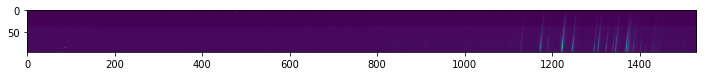

In [73]:
calibration_sub = calibration[1][5:100, :]
plt.imshow(calibration_sub)
plt.show()

This is an example of a calibration image. In the bottom right, we can see some of the spectral lines. We want to see an image of the neon spectra to figure out which rows we want to plot in the next cells. After some experimentation, we decided that rows 5 to 100 would look good. 

Next, we are going to graph the neon spectra and look for emission lines. We are going to focus on a specific part of the spectrum, near 6000 Angstroms, which we get from the Vernier Spectrometer. To find the pixel to angstrom scale, we will need the actual emission lines of neon. We get these from the text file in the announcement.

In [75]:
neon_lines = [3397.866, 3417.9035, 3472.5711, 3515.19, 3593.5263, 3600.1691, 4488.0926, 4636.125, 4837.3139, 5005.1587, 5031.3504, 5104.7011, 5113.6724, 5144.9384, 5188.6122, 5330.7775, 5341.0938, 5360.0121, 5400.5617, 5562.7662, 5656.5664, 5689.8163, 5719.2248, 5748.2985, 
              5764.4188, 5804.4496, 5820.1558, 5852.4878, 5881.895, 5944.8342, 5975.534, 6029.9971, 6074.3377, 6096.1631, 
              6128.4499, 6143.0626, 6163.5939, 6217.2812, 6266.495, 6304.789, 6334.4278, 6382.9917, 6402.246, 6506.5281, 
              6532.8822, 6598.9529, 6678.2764, 6717.043, 6929.4673, 7024.0504, 7032.4131, 7173.9381, 7245.1666, 7438.899, 
              7488.8712, 7535.7739, 8136.4057, 8300.3263, 8377.6065, 8495.3598, 8591.2583, 8634.647, 8654.3831, 8655.522, 
              8679.493, 8681.921, 8704.111, 8771.656, 8780.621, 8783.75, 8830.907, 8853.867, 8919.5007, 9148.672, 9201.759, 
              9300.853, 9326.507, 9425.379, 9486.68, 9534.163, 9665.424, 10798.12, 10844.54, 11143.02]


We stretched the axis by  4.3 and we added an offset of  5715 .


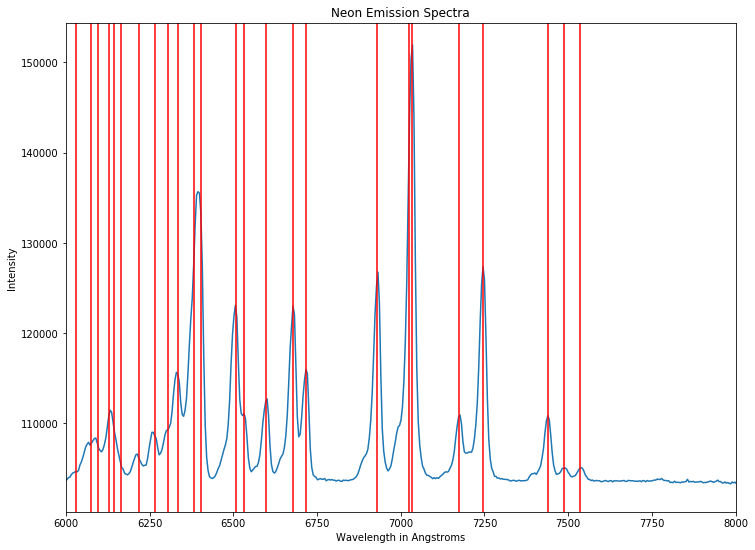

In [78]:
row = np.zeros(row_length)
for i in range(50, 100):
    row += mean_calibration[i, ::-1]
x_axis = np.arange(len(row))

C = 4.3
offset = 5715
x_axis = C*x_axis + offset

print("We stretched the axis by ", C, "and we added an offset of ", offset, ".")
plt.plot(x_axis, row)
for col in neon_lines:
    plt.axvline(col, color='r')
plt.xlim(6000, 8000)
plt.title("Neon Emission Spectra")
plt.xlabel("Wavelength in Angstroms")
plt.ylabel("Intensity")
plt.show()

After a lot of experimentation with C and offset, we find the values for which  we find the pixel to wavelength scale. The relative intensities are different from what we would expect. The ratios look different but that's because the relative intensity of spectra depends on the temperature. To get the same relative intensities as on wikipedia, we would have to control for temperature. 

In [11]:
height, width = sky_darks[0].shape #creating a mean sky_dark frame

# Make pixel-wise mean and standard deviation arrays
mean_sky_darks = np.zeros((height, width)) # initialize containers for data storage

for h in range(height):
    for w in range(width):
        pix_values = [arr[h,w] for arr in sky_darks] 
        pix_values = np.array(pix_values) # convert list to an array
        mean_sky_darks[h,w] = pix_values.mean()

In [13]:
height, width = sky[0].shape #creating a mean sky frame

# Make pixel-wise mean and standard deviation arrays
mean_sky = np.zeros((height, width)) # initialize containers for data storage

for h in range(height):
    for w in range(width):
        pix_values = [arr[h,w] for arr in sky] 
        pix_values = np.array(pix_values) # convert list to an array
        mean_sky[h,w] = pix_values.mean()

Let's see what range of the solar spectrum we actually want to graph.

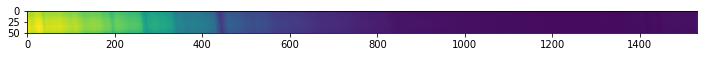

In [68]:
corrected_sky = sum(sky)*len(sky_darks)/len(sky) - sum(sky_darks) #subtracting dark current from the sky spectra

plt.imshow(corrected_sky[50:100, ::-1])
plt.show()

After some experimentation, we found that the best parts of the spectrum to graph would be rows 50 to 100.

The Sun's absorption wavelengths are 6550 nm, 6884 nm, and 7619 nm.


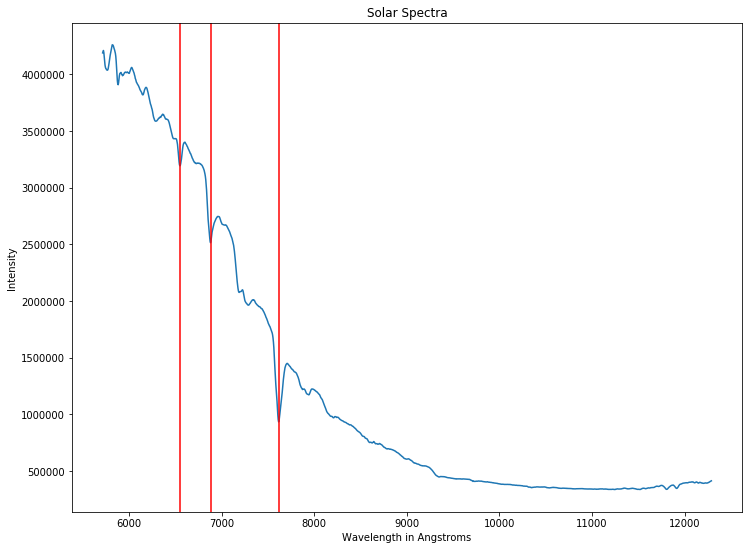

In [69]:
length = 1530 #sky[0].shape[1]
row_sky = np.zeros(length)
for i in range(50,100):
    row_sky += corrected_sky[i, ::-1] 
x_axis = np.arange(len(row_sky))
x_axis = x_axis*C + offset #adding scale
plt.plot(x_axis, row_sky)

solar_spectra = [6550, 6884, 7619] #determined by me changing the values until they look like they lie on the dips in the spectrum
for col in solar_spectra:
    plt.axvline(col, color='r')
    
print("The Sun's absorption wavelengths are", solar_spectra[0],"nm,", solar_spectra[1],"nm, and", solar_spectra[2],"nm.")
    
plt.title("Solar Spectra")
plt.xlabel("Wavelength in Angstroms")
plt.ylabel("Intensity")
plt.show()


We got approximate wavelengths for the absorption lines of the sun. These wavelengths approximately correspond to the expected Fraunhofer lines of the Sun. We know that these are absorption lines because the intensity dips at those wavelengths.

In [63]:
from IPython.display import HTML, display
import tabulate

accepted = [6562.81, 6867.19, 7593.70] #the fraunhofer lines from wikipedia

#now we create a table to summarise our data
table = [("Observed Wavelength (A)", "Expected Wavelength (A)", "Percent Error"), 
           (solar_spectra[0], accepted[0], (accepted[0]-solar_spectra[0])*100./accepted[0]),
          (solar_spectra[1], accepted[1], (solar_spectra[1]-accepted[1])*100./accepted[1]),
          (solar_spectra[2], accepted[2], (solar_spectra[2]-accepted[2])*100./accepted[2]),]

print("Here is a summary of the results from our lab.")
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Here is a summary of the results from our lab.


We don't see all the lines that we are 'supposed to see' emitted by Neon, but that's because relative intensity is dependent on temperature. At higher temperature, we would be able to see more lines.

We plot our data versus pixel values. But eventually we want to convert those pixel values to wavelengths, in Angstroms. We start by plotting our data and overplotting some of the expected wavelengths for Neon. We will stretch our axis by a coefficient, C, until our data lines up with the expected wavelengths of Neon, giving us our pixel/wavelength scale.

## Summary 

In this week's lab, we took a lot of spectra. We used a spectograph hooked up to the Angell Hall CCD and took data of neon and sunlight. We took bias, dark, and background frames where possible to try to reduce the noise in our data. We started by subtracting noise from our spectra.

The neon lamp spectra gave us emission lines that we could compare to known emission lines for neon. We basically used the neon lamp spectra to find the axis calibration between pixels and wavelength. We got a scale of 4.3 pixels/Angstrom and we had to add 5715 to get the pixel units to equal the wavelength units. 

We used that scale on the Sun's spectra to find the absorpiton lines of the Sun. We found that the Sun has absorption lines at 6550 A, 6884 A, and 7619 A. Our error was on the range of 0.2% - 0.3%, which is good. The small error comes from the fact we can't exactly measure spectra and the human error that comes from all the things we did in this lab by eye.

## Conclusion

Spectra is very important for understanding stars because it allows us to figure out the composition of stellar atmospheres based on little bits of light that we get from those distant stars. In this lab, we used neon spectra to get the pixel to wavelength ratio of the spectrograph we were using. Then, we found the absorption lines of the Sun to a very good accuracy. The relative intensities we observed were not as expected but that is because the relative intensity depends on a number of factors, including temperature. To get the same relative intensities as on wikipedia, we would have to control for temperature. 